# Early Liver Disease Prediction Using Machine Learning

**Motivation**: My father suffered from liver cancer, and the lack of affordable early diagnostic tools in Pakistan deeply affected our family. This experience inspired me to develop low-cost, AI-powered screening systems using routine blood tests, a small step toward preventing such outcomes in developing countries. 

**Dataset**: Indian Liver Patient Dataset (583 samples, public)
**Target**: 1 = Liver Patient, 0 = Healthy

In [8]:
import os
os.getcwd()

'd:\\xampp\\htdocs\\Liver-Disease-Prediction-AI\\notebook'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import shap
import warnings
warnings.filterwarnings('ignore')

# Load data from data folder
df = pd.read_csv('../data/indian_liver_patient.csv')

# Clean data
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Dataset'] = df['Dataset'].map({1: 1, 2: 0})
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median())

X = df.drop('Dataset', axis=1)
y = df['Dataset']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Dataset loaded: {df.shape[0]} samples, {y.sum()} liver patients")

Dataset loaded: 583 samples, 416 liver patients


In [2]:
# Train models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=300, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    print(f"{name} Accuracy: {accuracy_score(y_test, pred):.4f}")

Logistic Regression Accuracy: 0.7350
Random Forest Accuracy: 0.7436
XGBoost Accuracy: 0.7009



XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.26      0.34        34
           1       0.74      0.88      0.81        83

    accuracy                           0.70       117
   macro avg       0.61      0.57      0.57       117
weighted avg       0.67      0.70      0.67       117



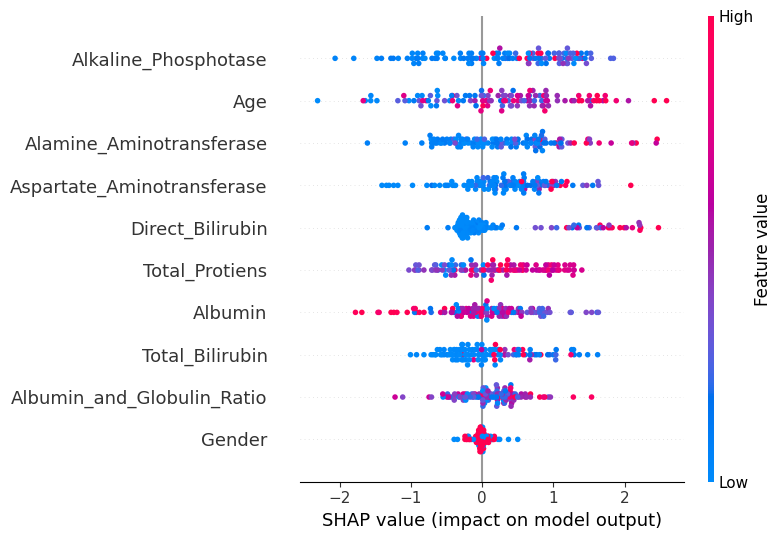

In [3]:
# Final XGBoost + SHAP
model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)
print("\nXGBoost Classification Report:")
print(classification_report(y_test, pred))

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)